## Задание 7.
#### Исполнитель: Филатов Андрей
Визуализировать эмпирическое распределение параметров модели в зависимости от значения $\sigma^2$. Модель: произвольная. Выборка: произвольная. Априорное распределение параметров: нормальное распределение со скалярным параметром дисперсии дисперсией $(N(0, \sigma^2 I))$.


### Импортируем все нужные библиотеки

In [38]:
import pymc3 as pm
import scipy.stats as st
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, multivariate_normal

Сгенерируем выборку нормального распределения

In [138]:
rv_X = multivariate_normal([0.0, 0.0], [[1.0, 0.0], [0.0, 1.0]])
rv_w = multivariate_normal([5.0, 3.0], [[1.0, 0.0], [0.0, 1.0]])
rv_norm = norm(0.0, 1.0)

In [139]:
X = rv_X.rvs(100)
w = rv_w.rvs(1)
y = (X @ w + rv_norm.rvs(size=(100)))

Для нахождение эмпирического распределения воспользуемся MCMC из библиотеки PyMC3

In [ ]:
sigmas = np.logspace(-2, 0, 10)
ws = []

for sigma in sigmas: 
    basic_model = pm.Model()

    with basic_model:
        # Priors for unknown model parameters
        weights = pm.Normal('weights', mu=0, sigma=sigma, shape=2)
        # Expected value of outcome
        mu = weights[0] * X[:, 0] + weights[1] * X[:, 1]
        # Likelihood (sampling distribution) of observations
        Y_obs = pm.Normal('Y_obs', mu=mu, sigma=1.0, observed=y)

    with basic_model:
        # draw 5000 posterior samples
        trace = pm.sample(4000)
    ws.append(trace['weights'])

In [155]:
x_opt, y_opt = ws[-1].mean(0)

Отрисуем зависимость распределения весов от $\sigma$. Стрелка указывает направления возрастания $\sigma$

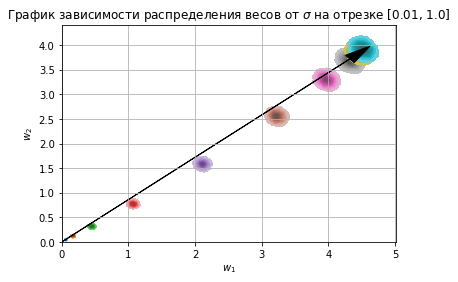

In [162]:
kde_data = []
plt.title('График зависимости распределения весов от $\sigma$ на отрезке [0.01, 1.0]')
label_patches = []

for i in range(len(ws)):
    tmp = sns.kdeplot(x=ws[i][:, 0], y=ws[i][:, 1], fill=True, label=f'$\sigma={round(sigmas[i], 2)}$')

plt.arrow(0.0, 0.0, x_opt-0.2, y_opt-0.2, head_width=0.2, head_length=0.4, color='green', fc='k', ec='k')
plt.ylim(0, y_opt + 0.5)
plt.xlim(0, x_opt + 0.5)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')

plt.grid()
plt.show()

Из результатов видно, что при $\sigma$ больше 1.0 вклад априорного распределения отсутствует, а при $\sigma$ меньше 0.01 решение вырождается к (0.0, 0.0)